<a href="https://colab.research.google.com/github/saidElhachemy/Metro-Interstate-Traffic-Volume/blob/main/Metro_Interstate_Traffic_Volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,48204,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,12,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,48143,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


* the None value in 'holiday' field is in almost all of the rows, hence the other value would be misleading
* the max value in rain_1h is a lot bigger than it's 75% value
* the min and 25% values in temp field are too far off each other

In [5]:
traffic.holiday.value_counts()

None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

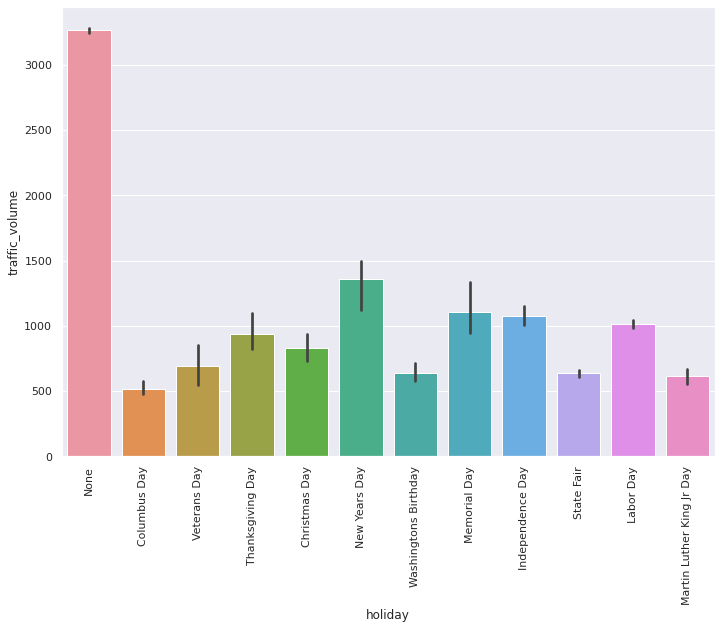

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(data=traffic, x='holiday', y='traffic_volume')
ax.tick_params(axis='x', rotation=90)

In [31]:
traffic.rain_1h.value_counts().sort_index(ascending=False).head(10)
# there is an anomaly with the highest value, we remove it

9831.30    1
55.63      1
44.45      1
31.75      1
28.70      2
27.57      3
25.46      3
25.32      3
23.80      3
21.42      3
Name: rain_1h, dtype: int64

In [32]:
traffic = traffic[traffic.rain_1h < 60]

In [54]:
# we look at the mean rain values per month
traffic_rain1h_month = traffic.groupby(pd.PeriodIndex(traffic['date_time'], freq="M"))['rain_1h'].mean().reset_index()

In [57]:
# we look at the mean traffic volume values per month
traffic_volume_month = traffic.groupby(pd.PeriodIndex(traffic['date_time'], freq="M"))['traffic_volume'].mean().reset_index()

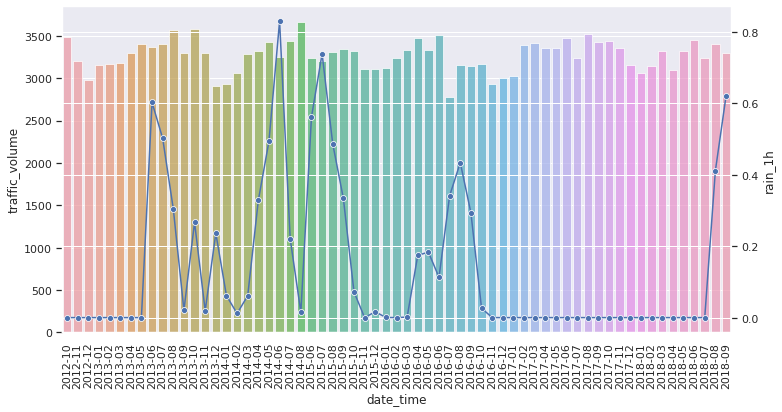

In [65]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
sns.lineplot(data = traffic_rain1h_month['rain_1h'], marker='o', sort = False, ax=ax2)
ax = sns.barplot(data=traffic_volume_month, x='date_time', y='traffic_volume',ax=ax1,alpha=0.7)
ax.tick_params(axis='x', rotation=90)
# as it is apparent, the rain does not affect the traffic volume

In [12]:
traffic.weather_main.value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

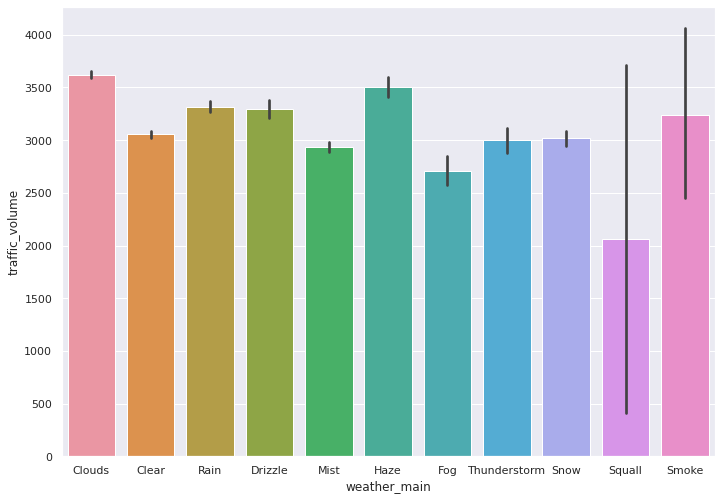

In [16]:
ax = sns.barplot(data=traffic, x='weather_main', y='traffic_volume')
# besides Squall and Smoke, the average traffic volume is above 2500 regardless of the weather

In [73]:
traffic.temp.value_counts().sort_index(ascending=True).head(5)
# the value 0 is too far off from the regular values

0.00      10
243.39     1
243.62     1
244.22     1
244.82     3
Name: temp, dtype: int64

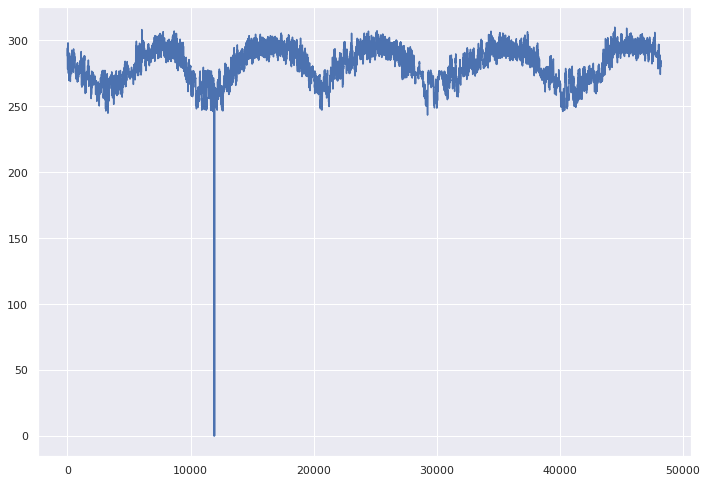

In [74]:
plt.plot(traffic.temp)
# the value 0 is too far off from the regular values

In [75]:
traffic = traffic[traffic.temp >0]

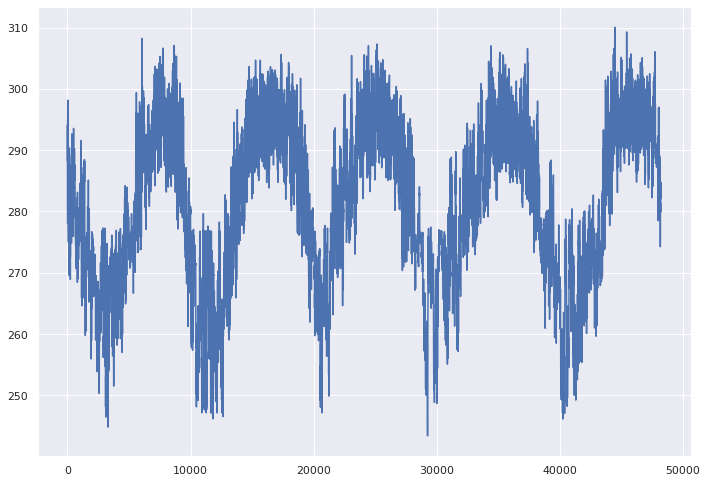

In [76]:
plt.plot(traffic.temp)

In [77]:
traffic.weather_description.value_counts()
# one third of the data has "sky is clear" weather, it is safe to assume that the average volume in those days represents the dataset 

sky is clear                           11655
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

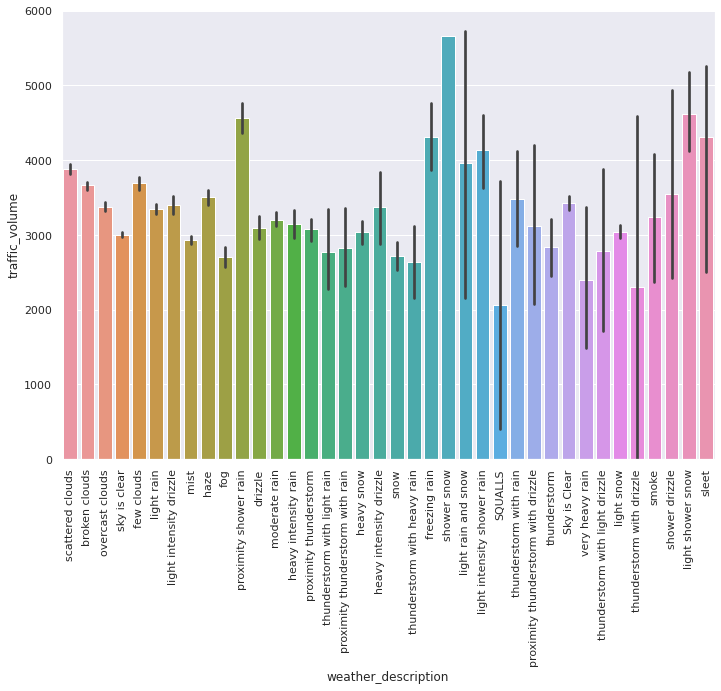

In [79]:
ax = sns.barplot(data=traffic, x='weather_description', y='traffic_volume')
ax.tick_params(axis='x', rotation=90)
# the average volume for clear sky days is around 3800

In [82]:
traffic.clouds_all.value_counts().head(20)

90    16442
1     12761
75     5068
40     3993
0      1978
20     1849
64     1558
5      1094
92      776
12      273
8       270
24      186
32      185
88      183
80      181
48      180
68      179
36      169
56      166
76      153
Name: clouds_all, dtype: int64

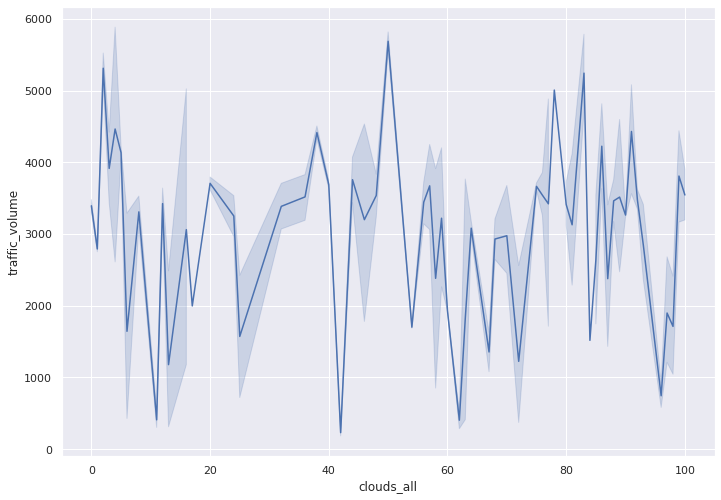

In [81]:
ax = sns.lineplot(data=traffic, x='clouds_all', y='traffic_volume')

**let's see what is the best day to go out**

In [98]:
# we would like it to be a clear or cloudy day
traffic_goodweather = traffic[(traffic["weather_main"] == 'Clouds') | (traffic["weather_main"] == 'Clear')]
traffic_goodweather.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,28545,28545.000000,28545.0,28545.0,28545.000000,28545,28545,28545,28545.000000
unique,12,NaN,NaN,NaN,NaN,2,6,28481,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,2014-01-20 16:00:00,NaN
freq,28508,NaN,NaN,NaN,NaN,15164,11655,2,NaN
mean,NaN,281.575903,0.0,0.0,34.754213,NaN,NaN,NaN,3355.356980
std,NaN,13.723568,0.0,0.0,36.479169,NaN,NaN,NaN,1964.473123
min,NaN,244.220000,0.0,0.0,0.000000,NaN,NaN,NaN,1.000000
25%,NaN,271.650000,0.0,0.0,1.000000,NaN,NaN,NaN,1416.000000
50%,NaN,283.350000,0.0,0.0,20.000000,NaN,NaN,NaN,3530.000000
75%,NaN,293.150000,0.0,0.0,75.000000,NaN,NaN,NaN,4975.000000


In [102]:
# the day should be a work day
traffic_goodweather_noholiday = traffic_goodweather[traffic_goodweather["holiday"] == 'None']
traffic_goodweather_noholiday.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,28508,28508.000000,28508.0,28508.0,28508.000000,28508,28508,28508,28508.000000
unique,1,NaN,NaN,NaN,NaN,2,6,28444,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,2017-09-29 19:00:00,NaN
freq,28508,NaN,NaN,NaN,NaN,15146,11639,2,NaN
mean,NaN,281.578156,0.0,0.0,34.759997,NaN,NaN,NaN,3358.597867
std,NaN,13.723724,0.0,0.0,36.480785,NaN,NaN,NaN,1963.652502
min,NaN,244.220000,0.0,0.0,0.000000,NaN,NaN,NaN,1.000000
25%,NaN,271.650000,0.0,0.0,1.000000,NaN,NaN,NaN,1428.000000
50%,NaN,283.350000,0.0,0.0,20.000000,NaN,NaN,NaN,3534.500000
75%,NaN,293.160000,0.0,0.0,75.000000,NaN,NaN,NaN,4976.000000


In [106]:
# let's focus more on the recent date_time 2018
traffic_goodweather_noholiday_2018 = traffic_goodweather_noholiday[traffic_goodweather_noholiday["date_time"] > "2018"]
traffic_goodweather_noholiday_2018.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,4321,4321.000000,4321.0,4321.0,4321.000000,4321,4321,4321,4321.000000
unique,1,NaN,NaN,NaN,NaN,2,6,4320,NaN
top,None,NaN,NaN,NaN,NaN,Clear,sky is clear,2018-09-29 19:00:00,NaN
freq,4321,NaN,NaN,NaN,NaN,2326,2313,2,NaN
mean,NaN,282.680843,0.0,0.0,30.030548,NaN,NaN,NaN,3423.519556
std,NaN,14.719290,0.0,0.0,34.887458,NaN,NaN,NaN,1948.964737
min,NaN,247.080000,0.0,0.0,0.000000,NaN,NaN,NaN,205.000000
25%,NaN,272.020000,0.0,0.0,1.000000,NaN,NaN,NaN,1521.000000
50%,NaN,285.820000,0.0,0.0,5.000000,NaN,NaN,NaN,3699.000000
75%,NaN,295.370000,0.0,0.0,75.000000,NaN,NaN,NaN,4982.000000


In [110]:
# we would like a traffic volume as low as possible
# first off, let's group the data by days
traffic_goodweather_noholiday_2018_day = traffic_goodweather_noholiday_2018.groupby(pd.PeriodIndex(traffic_goodweather_noholiday_2018['date_time'], freq="D"))['traffic_volume'].mean().reset_index()
traffic_goodweather_noholiday_2018_day.traffic_volume.value_counts().sort_index(ascending=True)

277.000000     1
393.333333     1
459.800000     1
744.800000     1
825.444444     1
              ..
4888.500000    1
4897.777778    1
5270.545455    1
5587.000000    1
5773.500000    1
Name: traffic_volume, Length: 255, dtype: int64

In [113]:
traffic_goodweather_noholiday_2018_day[traffic_goodweather_noholiday_2018_day.traffic_volume == traffic_goodweather_noholiday_2018_day.traffic_volume.min()]
# the best to go out in 2018 is 2018-04-03, which also corresponds to spring

,date_time,traffic_volume
89,2018-04-03,277.0
